### Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sn
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import preprocessing
from sklearn import tree
from IPython.display import Image
import pydotplus
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from xgboost import XGBRegressor
from tabulate import tabulate
from colorama import Fore, Style

In [11]:
df = pd.read_csv(r"C:\Users\tuf\Desktop\Internshala\Machine Learning\Project\ML case Study.csv")

college_data_df = pd.read_csv(r"C:\Users\tuf\Desktop\Internshala\Machine Learning\Project\Colleges.csv")

city_data_df = pd.read_csv(r"C:\Users\tuf\Desktop\Internshala\Machine Learning\Project\cities.csv")

In [12]:

def assign_tier(row):
     # If 'College' is in 'Tier 1', assign 'Tier 1'
    if row['College'] in college_data_df['Tier 1'].values:
        return 'Tier 1'
    # If 'College' is in 'Tier 2', assign 'Tier 2'
    elif row['College'] in college_data_df['Tier 2'].values:
        return 'Tier 2'
    # If 'College' is in 'Tier 3', assign 'Tier 3'
    elif row['College'] in college_data_df['Tier 3'].values:
        return 'Tier 3'
    # If not found in any tier, assign 'Unknown'
    else:
        return 'Unknown'

In [14]:
# Function to assign a city type (metro or non-metro) based on 'city_data_df'.

def assign_city(row):
    if row['City'] in city_data_df['Metrio City'].values:
        return 1
    elif row['City'] in city_data_df['non-metro cities'].values:
        return 0
    else:
        return 'unknown'

    
# Apply 'assign_city' function to create a 'metro_city' column in the 'df' dataframe.
df['metro_city'] = df.apply(assign_city, axis=1)

# Apply 'assign_tier' function to create a 'Tier' column in the 'df' dataframe.
df['Tier'] = df.apply(assign_tier, axis=1)

In [15]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,metro_city,Tier
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58,0,Tier 2
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87,0,Tier 2
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02,0,Tier 3
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39,0,Tier 3
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10,0,Tier 1


### Create Dummy variables

In [16]:
#Create Dummies variable for 'Tier' and 'Role' columns
df = pd.get_dummies(df, columns = ['Tier', 'Role'])

#Rename the tier columns to remove the 'Tier_' prefix
df = df.rename(columns={'Tier_Tier 1': 'Tier_1'})
df = df.rename(columns={'Tier_Tier 2': 'Tier_2'})
df = df.rename(columns={'Tier_Tier 3': 'Tier_3'})

In [17]:
# deleting unnecessary columns

del df['College']
del df['City']


### EDD Analysis

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Previous CTC         1589 non-null   float64
 1   Previous job change  1589 non-null   int64  
 2   Graduation Marks     1589 non-null   int64  
 3   EXP (Month)          1589 non-null   int64  
 4   CTC                  1589 non-null   float64
 5   metro_city           1589 non-null   int64  
 6   Tier_1               1589 non-null   uint8  
 7   Tier_2               1589 non-null   uint8  
 8   Tier_3               1589 non-null   uint8  
 9   Role_Executive       1589 non-null   uint8  
 10  Role_Manager         1589 non-null   uint8  
dtypes: float64(2), int64(4), uint8(5)
memory usage: 82.4 KB


In [20]:
df.shape

(1589, 11)

In [21]:
df.describe()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,metro_city,Tier_1,Tier_2,Tier_3,Role_Executive,Role_Manager
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,55518.453744,2.528634,59.855255,39.044682,75353.278798,0.514160,0.363751,0.297042,0.339207,0.793581,0.206419
std,6655.218445,1.123918,14.935139,14.108875,12587.288237,0.499957,0.481230,0.457099,0.473589,0.404862,0.404862
min,36990.000000,1.000000,35.000000,18.000000,53020.320000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50518.000000,2.000000,46.000000,26.000000,66902.350000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,55291.000000,3.000000,60.000000,39.000000,73028.670000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,60109.000000,4.000000,73.000000,51.000000,80588.670000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,77911.000000,4.000000,85.000000,64.000000,123416.990000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
df.head()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,metro_city,Tier_1,Tier_2,Tier_3,Role_Executive,Role_Manager
0,55523.0,3,66,19,71406.58,0,0,1,0,0,1
1,57081.0,1,84,18,68005.87,0,0,1,0,1,0
2,60347.0,2,52,28,76764.02,0,0,0,1,1,0
3,49010.0,2,81,33,82092.39,0,0,0,1,1,0
4,57879.0,4,74,32,73878.10,0,1,0,0,1,0


### Check for Null values

In [24]:
null_values = df.isna().sum()

print(null_values[null_values > 0])

Series([], dtype: int64)


##### Note : There is no null values in this data

## Outliers Determination and Treatment

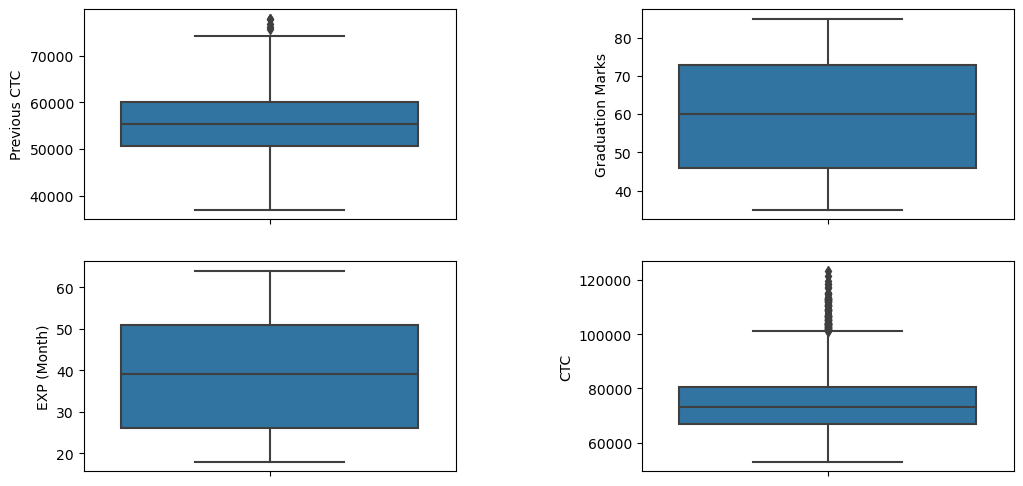

In [25]:
numerical_columns = ['Previous CTC', 'Graduation Marks', 'EXP (Month)', 'CTC']
plt.figure(figsize=(12, 6))
plt.subplots_adjust(wspace=0.5)
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, y=col)

plt.show()

<Axes: xlabel='Previous CTC', ylabel='CTC'>

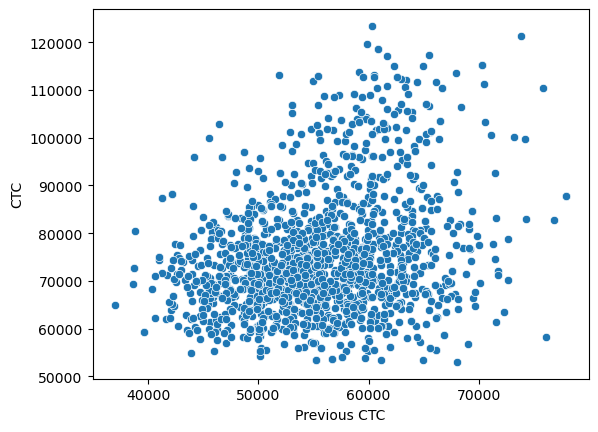

In [29]:
sns.scatterplot(x = df['Previous CTC'], y = df['CTC'])

<Axes: xlabel='Previous job change', ylabel='CTC'>

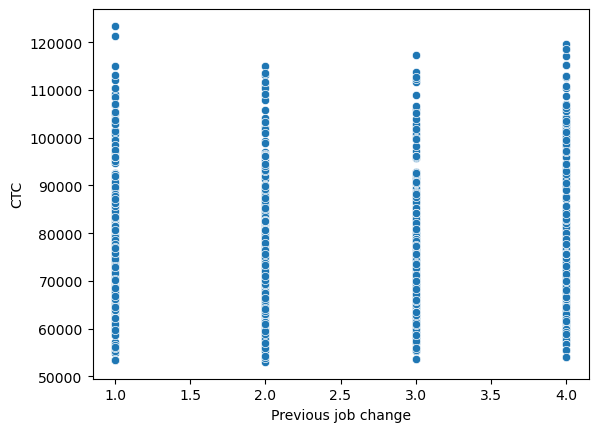

In [30]:
sns.scatterplot(x = 'Previous job change', y = 'CTC', data = df)

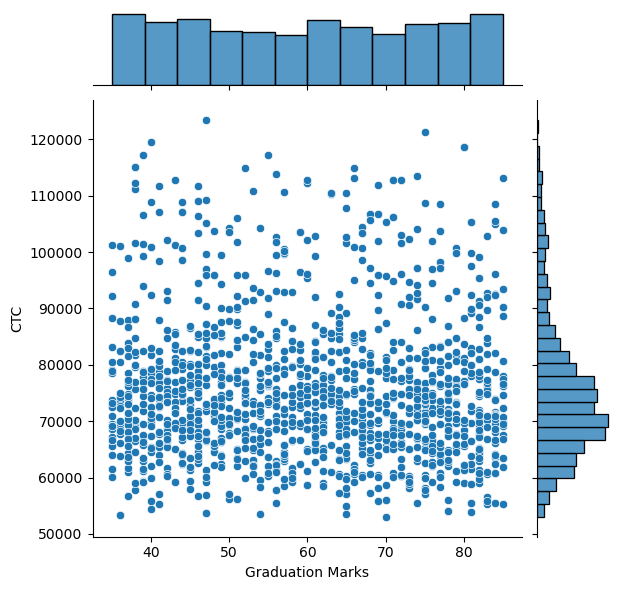

In [31]:
sns.jointplot(x = df['Graduation Marks'], y= df['CTC'])

C:\Users\tuf\AppData\Local\Temp\ipykernel_39124\4070908615.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CTC'])


<Axes: xlabel='CTC', ylabel='Density'>

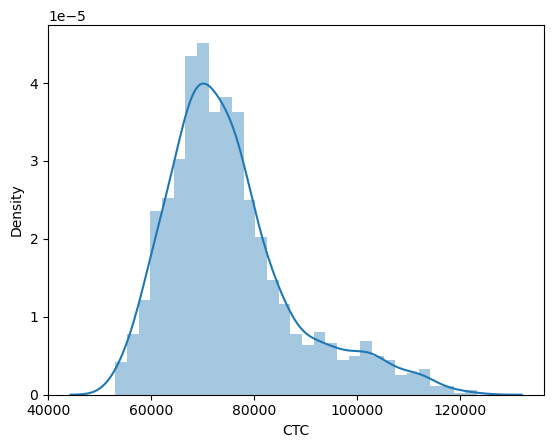

In [32]:
sns.distplot(df['CTC'])

In [33]:
# Calculate the 99th percentile value of the 'Previous CTC' column in the 'df' DataFrame.

upper_limit = np.percentile(df['Previous CTC'], [99])[0]

In [34]:
upper_limit

71506.92

In [35]:
#check values that highr then upper value

df[(df['Previous CTC'] > upper_limit)]

#there is many values that is higher then upper limit but it is in considerable range

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,metro_city,Tier_1,Tier_2,Tier_3,Role_Executive,Role_Manager
116,77911.0,1,50,58,87831.62,1,0,0,1,1,0
292,74198.0,1,57,25,99644.51,0,0,0,1,0,1
543,73856.0,1,75,54,121362.73,1,1,0,0,0,1
572,71543.0,4,82,30,61366.78,1,1,0,0,1,0
701,71549.0,4,47,50,83116.21,0,0,1,0,1,0
847,71756.0,4,67,23,72141.43,1,1,0,0,1,0
860,75785.0,4,63,37,110338.25,1,1,0,0,0,1
941,72319.0,1,51,50,63538.43,1,0,0,1,1,0
1024,72661.0,3,74,47,70238.70,1,1,0,0,1,0
1047,73214.0,4,57,22,100119.53,0,1,0,0,0,1


In [36]:
#replace values that is higher then upper limit

df['Previous CTC'][(df['Previous CTC'] > 3*upper_limit)] = 3*upper_limit

C:\Users\tuf\AppData\Local\Temp\ipykernel_39124\2655405489.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Previous CTC'][(df['Previous CTC'] > 3*upper_limit)] = 3*upper_limit


In [37]:
#upper limit for CTC

upper_limit2 = np.percentile(df['CTC'], [99])[0]

In [38]:
upper_limit2

112826.26

In [39]:
#check values that highr then upper value

df[(df['CTC'] > upper_limit2)]

#there is many values that is higher then upper limit but it is in considerable range

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,metro_city,Tier_1,Tier_2,Tier_3,Role_Executive,Role_Manager
34,60894.0,4,80,28,118651.89,0,1,0,0,0,1
185,70258.0,4,38,36,115126.75,0,0,1,0,0,1
254,51912.0,2,66,50,113141.14,1,0,1,0,0,1
328,62264.0,2,52,64,114996.23,0,0,0,1,0,1
543,73856.0,1,75,54,121362.73,1,1,0,0,0,1
577,59101.0,3,56,31,113843.16,1,0,0,1,0,1
668,60476.0,1,85,62,113212.07,1,1,0,0,0,1
883,64930.0,1,66,51,114939.65,1,0,0,1,0,1
1146,61709.0,4,39,60,117207.24,1,1,0,0,0,1
1230,60298.0,1,47,52,123416.99,0,0,1,0,0,1


In [40]:
#replace values that is higher then upper limit

df['CTC'][(df['CTC'] > 3*upper_limit2)] = 3*upper_limit2

C:\Users\tuf\AppData\Local\Temp\ipykernel_39124\3955326754.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CTC'][(df['CTC'] > 3*upper_limit2)] = 3*upper_limit2


##### Note : There is no outliers in this data which can affect the data